## 打开工作表

xlwings中的对象层次结构为：
apps->books->sheets->range

In [1]:
pwd 

'/Users/mac/我的项目/test'

In [2]:
import xlwings as xw
# 打开一个新的 workbook 

In [6]:
## 创建新的Excel文件
# 方法1：
# 创建一个新的App，并在新App中新建一个Book
wb = xw.Book('1.xlsx')


In [5]:
# 方法2：上述代码是创建应用打开Excel的，这种方式打开之后需要进行关闭。
# 当前App下新建一个Book
# visible参数控制创建文件时可见的属性
app=xw.App(visible=False,add_book=False)
wb=app.books.add()
# wb.save('1.xlsx')
# wb.close()
# app.quit() #结束进程

## 打开 sheet 的三种方式

In [8]:
# 打开第一个 sheet
wb.sheets[0]

<Sheet [1.xlsx]Sheet1>

In [11]:
# 打开名字为 "xchaoinfo" sheet
sheet = wb.sheets["xchaoinfo"]

In [9]:
# 打开当前活动的 sheet
sht = wb.sheets.active

## 读写数据到 sheet 中

In [10]:
sht.range('A1').value

In [40]:
wb.sheets[0].range('a10').options(expand='table').value=[[3,1],[2,5]] #写入数组

In [28]:
wb.sheets[0].range('A1').options(transpose=True).value=[[1,1],[7,7]]  #转置写入数组

In [24]:
display(wb.sheets[0].range('A1:c3').value)

[[1.0, 3.0, 5.0], [2.0, 4.0, 6.0], [5.0, 6.0, 5.0]]

In [37]:
wb.sheets[0].range('a15').row  #获取行号

15

In [42]:
wb.sheets[0].clear_contents()  #清空内容

In [43]:
df = pd.DataFrame([[1,2], [3,4]], columns=['a', 'b'])
df 

<IPython.core.display.Javascript object>

,a,b
0,1,2
1,3,4


In [44]:
sht.range('A1').value = df # 数据类型的双向转换

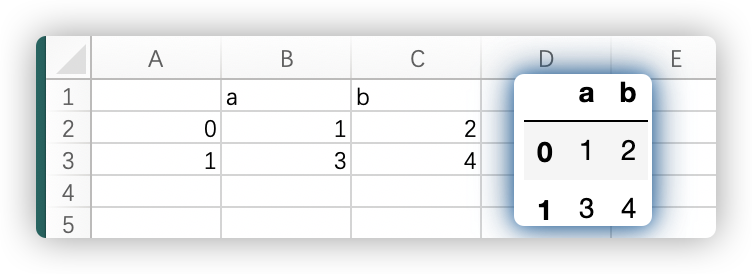

## 属性

In [52]:
ws = wb.sheets['Sheet1']

In [ ]:
# 获取"A2"单元格的行标和列标
print(ws.range('A2').row)
print(ws.range('A2').column)
# 高度和宽度
print(ws.range('A2').row_height)
print(ws.range('A2').column_width)
# 设置颜色,可根据RGB颜色表寻找自己想要的颜色
ws.range('A2').color = (255,0,0)
# 获取颜色
print(ws.range('A2').color)
# 清除颜色格式
ws.range('A2').color = None
# 使用公式
ws.range('A2').formula='=SUM(A1,A2)'
# 另外还可以获取某一个单元格的公式
print(ws.range('A2').formula_array)
# 清除工作表的所有内容但是保留原有格式
ws.clear_contents()
# 当然了还有很多其他的属性
#range.address        range.current_region    range.end
#range.api            range.autofit          range.expand          

In [53]:
ws.used_range.shape

(3, 3)

In [56]:
import xlwings as xw
app1 = xw.App(visible=False)


In [57]:
xw.apps.active # 返回活动的应用程序

<Excel App 36690>

In [59]:
xw.apps.count  #活动应用程序的key

1

In [62]:
（1）wb.app.calculate()               # Calculates all open books.
（2）wb.app.calculation = ‘manual’    # 设置计算模式
（3）wb.app.display_alerts = True     # 默认值为True。False的情况下执行操作的时候会忽略Excel的提示和警报消息(即弹窗信息)    
（4）wb.app.screen_updating = False   # 禁止屏幕更新(刷新)
（5）wb.app.range(cell1, cell2=None)  # 获取单元格
（6）wb.app.selection                 # 将所选单元格作为Range返回
（7）xw.App().version                 # 返回Excel程序版本号

CommandError: Command failed:
		OSERROR: -600
		MESSAGE: Application isn't running.
		COMMAND: app(pid=35136).calculation.set(k.calculation_manual)

In [67]:
wb = xw.Book('1.xlsx')    #以xw.Book()方式打开工作簿

In [68]:
wb.sheets         #查看当前工作簿的所有Sheet详情


Sheets([<Sheet [1.xlsx]Sheet1>])

In [69]:
wb.sheets.active  #激活一个Sheet发现是Sheet2

<Sheet [1.xlsx]Sheet1>

In [70]:
# 在Sheet1前新增一个Sheet并命名：wb.sheets.add(name= None,before = None,after = None)
wb.sheets.add(name='Python知识学堂', before='Sheet1')

<Sheet [1.xlsx]Python知识学堂>

In [73]:
sht=wb.sheets.active   #激活Sheet页，这个Sheet是新增的 

## 方法或属性：

In [ ]:
sheet = wb.sheets['Sheet1']    # 引用工作表Sheet1
sheet.active                   #获取当前活跃的工作簿
sheet.autofit()                #在整个工作表上自动调整宽度,可传参数
sheet.autofit(axis='c')        # 在整个工作表上自动调整列的宽度
sheet.autofit(axis='r')        # 在整个工作表上自动调整行的宽度
sheet.book                     # 返回指定Sheet的book,输出 <Book [2.xlsx]>
sheet.cells                    # 返回一个Range对象，该对象表示Sheet上的所有单元格（而不仅仅是当前正在使用的单元格）输出<Range [2.xlsx]Sheet1!$1:$1048576>
sheet.name                     # 获取工作表的名称
sheet.name = '我爱python知识学堂'# 工作表重命名
sheet.clear()                  # 清空工作表中的内容和格式
sheet.index                    # 返回对应sheet的索引值，从0计数
sheet.delete()                 # 删除工作表
sheet.clear_contents()         # 清除工作表的内容，但保留格式
# 工作表sheet中有数据区域最大的行数，法1
sheet['a1048576'].end('up').row           
# 工作表sheet中有数据区域最大的行数，法2
sheet.used_range.last_cell.row
# 工作表sheet中有数据区域最大的列数，法1
sheet['xfd1'].end('left').column
# 工作表sheet中有数据区域最大的列数，法2                           
sheet.used_range.last_cell.column        

In [ ]:
# 取值
sheet.cells(行号,列号).value

In [79]:
sht.api.used_range

app(pid=36690).workbooks[1].worksheets['Python知识学堂'].used_range

In [76]:
sht

<Sheet [1.xlsx]Python知识学堂>

In [87]:
sht.insert   # 插入行，在第2-4行插入空白行

1

## 方法或属性：

In [ ]:
xw.Range('A1')                # 引用A1单元格
xw.Range('A1').value          # 取A1单元格的值,输出1.0
xw.Range('A1').value = 12     # 设置值
xw.Range('A1').raw_value      # 直接获取并设置所使用（pywin32）引擎发送/接受的值，而无需进行任何xlwings数据清理/转换。
xw.Range ('A1:B2').value      # 引用区域并取值，输出[[1.0, 9.0],[2.0, 10.0]]，以二元list形式
# 与上述等效
xw.Range ((1,1), (2,2)).value   
# 与上述等效
xw.Range (('A1'), ('B2')).value 
# 添加超链接
xw.Range ('A9').add_hyperlink(address='www.baidu.com') 
xw.Range ('A10').address      # 返回表示范围参考的字符串值，输出 $A$10
xw.Range ('A1').api           # 返回所使用引擎的本机对象
xw.Range ('A1').autofit()     # 自动调整范围内所有单元格的宽度和高度。
# 如果仅自动调整列的宽度，使用sheet.range('A1:B2').columns.autofit()
# 如果仅自动调整行的高度，使用 sheet.range('A1:B2').rows.autofit()
xw.Range ('A1').clear()       # 清除所选择单元格的内容和格式，可选择范围
# 清除范围的内容，但保留格式。
xw.Range ('A1').clear_contents()   
xw.Range ('A1').color         #获取A1单元格的背景色。
#设置A1单元格的背景色，RGB颜色
xw.Range ('A1').color = (255,255,255)  
xw.Range ('A1').color = None  #删除背景色
xw.Range ('B1:C4').column     # 返回所选范围第一列的列标，此处输出2
xw.Range ('B2:C4').row        # 返回所选范围第一行的行标，此处输出2
xw.Range ('A1:B2').count      # 返回所选范围单元格数量，此处输出4
# 此属性返回一个Range对象，该对象表示由（但不包括）空白行和空白列或工作表的边缘的任意组合限制的范围，好比是一片连接的区域
xw.Range ('A1').current_region  
xw.Range ('A1').delete()      # 删除单元格A1,有参数left和up，如delete('up')。如果省略，Excel将根据范围的形状进行决定。
xw.Range ('A1').end('down')   # 返回一个Range对象，该对象表示包含源范围的区域末尾的单元格。此处输出<Range [3.xlsx]Sheet1!$A$8>，参数可传down,up,left,right，其实也是返回ctrl + 方向
# 设置A9单元格公式计算的值
xw.Range ('A9').formula='=SUM(B1:B5)'
# 输出公式值，输出'=SUM(B1:B5)'
print(xw.Range ('A9').formula)       
# 以指定的格式返回范围的地址
xw.Range ('A1:B2').get_address()  
#参数：
#row_absolute(bool ,默认为True)–设置为True可以将引用的行部分作为绝对引用返回。#column_absolute(bool,默认为True)–设置为True可以将引用的列部分作为绝对引用返回。
#include_sheetname(bool ,默认为False)–设置为True可以在地址中包含工作表名称。
#external(bool ,默认为False)–设置为True以返回带有工作簿和工作表名称的外部引用。
#具体的情况大家可以传入几个参数试试
xw.Range ('A1:B2').height     # 返回单元格(范围)的高度
xw.Range ('A1:B2').width      # 返回范围的宽度
# 获取范围的高度（以磅为单位）
xw.Range ('B2:C4').row_height      
# 设置范围的高度（以磅为单位）
xw.Range ('B2:C4').row_height = 15 

In [89]:
xw.Range('A1:C1').options(ndim=2).value

[[1.0, 2.0, 3.0]]

In [90]:
xw.Range('B2:C4').options(ndim=2).value

[[3.0, 4.0], [4.0, 5.0], [5.0, 6.0]]

In [91]:
wb.sheets[0].shapes.count   # 返回集合中的对象数，输出1

0

In [92]:
wb.sheets[0].shapes         # 输出Shapes

Shapes([])

Excel的VBA和Xlwings在处理数据方面速度是怎样的呢？这里不在进行写代码的方式来说明，我们来分析一下看看，以便分析一下VBA的在这方面的优势和不足，假设我们现在要计算上十万行Excel文件，操作其中两列数据的和：



方法1：使用Xlwings读Range的数据进行操作，显然这种方式要使用for循环反复的引用range对象，使得在计算的过程中这是非常耗时的。

方法2：使用Xlwings将数据一次性读入python的List中，在List中进行计算返回结果，这样的操作方式避免了大量引用range对象，减少了耗时，当然了数量量很大的时候也就对设备的内存提出了新的要求。

方法3：使用VBA进行操作。VBA是Visual Basic的一种宏语言，是在其桌面应用程序中执行通用的自动化(OLE)任务的编程语言。跟使用使用第三方库不一样的是，VBA操作的时候是基于更加底层的接口来实现的，所以从这个角度来看，这种方式是肯定比方法1快的。

方法4：当然了，我们知道xlwings是支持pandas的对象的，因此我们也可以使用pandas来进行处理，毕竟pandas是处理数据的神器，而且pandas处理大量的数据也有其独有的优势，这是值得我们注意的。

## 插图

In [ ]:
import xlwings as xw
sheet = xw.Book('4.xlsx').sheets[0]
#新增chart
chart = sheet.charts.add()                        
#数据源：sheet.range('A1:B7')，或者sheet.range('A1').expand()
chart.set_source_data(sheet.range('A1').expand())  
chart.chart_type = 'line' 
#设置图标的类型，此处为线型，具体的类型查看office官网VBA操作的手册
#标题名称
title='python知识学堂粉丝数'                    
chart.api[1].SetElement(2)
#设置标题名称
chart.api[1].ChartTitle.Text =title          
chart.api[1].SetElement(302)                  #横线
#横轴标题名称
chart.api[1].Axes(1).AxisTitle.Text = "日期"  
chart.api[1].SetElement(311)
chart.api[1].Axes(2).AxisTitle.Text = "粉丝数" #纵轴标题名称

## 调用Python宏

In [2]:
import os
import xlwings as xw
def my_macro():
    sheet = xw.Book.caller().sheets[0]
    sheet.range('A1').value = '我爱python知识学堂'
if __name__ == '__main__':
    xw.Book('文献分词.xlsx').set_mock_caller()     # 设置调用者
my_macro()

In [ ]:
import xlwings as xw


def main():
    wb = xw.Book.caller()
    sheet = wb.sheets[0]
    if sheet["A1"].value == "Hello xlwings!":
        sheet["A1"].value = "Bye xlwings!"
    else:
        sheet["A1"].value = "Hello xlwings!"


if __name__ == "__main__":
    xw.Book("./data/myproject.xlsm").set_mock_caller()
    main()
